# **Music Recommendation System**

### **Problem Definition**

**Context:**
With millions of songs available online, finding music that matches individual taste is challenging. Platforms like Spotify rely on recommendation systems to keep users engaged and satisfied.

**Objective:**
Build a system that recommends the **top 10 songs** a user is most likely to listen to based on their past activity.

**Key Questions:**

* How can user listening patterns be modeled?
* Which features best predict song preferences?
* Which recommendation approach performs best?

**Problem Formulation:**
Using user-song interaction and song metadata, develop a data-driven model that predicts and ranks songs each user is most likely to enjoy.

## **Data Dictionary**

The core data is the Taste Profile Subset released by the Echo Nest as part of the Million Song Dataset. There are two files in this dataset. The first file contains the details about the song id, titles, release, artist name, and the year of release. The second file contains the user id, song id, and the play count of users.

**song_data**

- song_id - A unique id given to every song
- title - Title of the song
- Release - Name of the released album
- Artist_name - Name of the artist
- year - Year of release

**count_data**

- user _id - A unique id given to the user
- song_id - A unique id given to the song
- play_count - Number of times the song was played

## **Data Source**
http://millionsongdataset.com/

### **Importing Libraries and the Dataset**

**Note**: After running this commands, you’ll be prompted to restart your notebook/runtime. Please go ahead and do that. Once restarted, simply proceed to the next step of your workflow

In [1]:
!pip install numpy==1.26.0

zsh:1: command not found: pip


### **Load the dataset**

In [2]:
# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

# Basic libraries for numeric and dataframe computations
import numpy as np              # numerical operations
import pandas as pd             # dataframe handling and manipulation
import matplotlib.pyplot as plt # basic plotting and visualization
import seaborn as sns           # statistical visualizations

# Additional utilities
from collections import defaultdict           # dictionary that returns default values
from sklearn.metrics import mean_squared_error # performance metric
from sklearn.metrics.pairwise import cosine_similarity # compute cosine similarity


In [3]:
# Importing the datasets
import gdown
import pandas as pd
import os

os.makedirs("data", exist_ok=True)

files = {
    "data/song_data.csv": "1hW3UUQjKwMH_THHh3mn_UAoG-gM2Ay-Z",
    "data/count_data.csv": "1G-Z7sACzbH1ziI2nYuGMjoEttGFqsnbW",
}

for path, fid in files.items():
    url = f"https://drive.google.com/uc?id={fid}"
    if not os.path.exists(path):
        gdown.download(url, path, quiet=False)

song_df = pd.read_csv("data/song_data.csv")
count_df = pd.read_csv("data/count_data.csv")

### **Understanding the data by viewing a few observations**

In [4]:
# Display first 10 records of count_df data
count_df.head(10)

,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
5,5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5
6,6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1
7,7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1
8,8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1
9,9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1


In [5]:
# Display first 10 records of song_df data
song_df.head(10)

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
5,SOZVAPQ12A8C13B63C,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All...",Berwald: Symphonies Nos. 1/2/3/4,David Montgomery,0
6,SOQVRHI12A6D4FB2D7,We Have Got Love,Strictly The Best Vol. 34,Sasha / Turbulence,0
7,SOEYRFT12AB018936C,2 Da Beat Ch'yall,Da Bomb,Kris Kross,1993
8,SOPMIYT12A6D4F851E,Goodbye,Danny Boy,Joseph Locke,0
9,SOJCFMH12A8C13B0C2,Mama_ mama can't you see ?,March to cadence with the US marines,The Sun Harbor's Chorus-Documentary Recordings,0


### **Let us check the data types and and missing values of each column**

In [6]:
# Display info of count_df
count_df.info

<bound method DataFrame.info of          Unnamed: 0                                   user_id  \
0                 0  b80344d063b5ccb3212f76538f3d9e43d87dca9e   
1                 1  b80344d063b5ccb3212f76538f3d9e43d87dca9e   
2                 2  b80344d063b5ccb3212f76538f3d9e43d87dca9e   
3                 3  b80344d063b5ccb3212f76538f3d9e43d87dca9e   
4                 4  b80344d063b5ccb3212f76538f3d9e43d87dca9e   
...             ...                                       ...   
1999995     1999995  d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92   
1999996     1999996  d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92   
1999997     1999997  d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92   
1999998     1999998  d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92   
1999999     1999999  d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92   

                    song_id  play_count  
0        SOAKIMP12A8C130995           1  
1        SOBBMDR12A8C13253B           2  
2        SOBXHDL12A81C204C0           1  
3        SOBYHAJ12A

**Dataset Overview (count_df)**

The `count_df` dataset contains one million observations and five variables related to musical recordings. The fields represent song-level metadata including a unique identifier (`song_id`), track title (`title`), release or album name (`release`), artist name (`artist_name`), and year of release (`year`).

**Key Observations**

* The dataset includes **1,000,000 rows and 5 columns**, matching the structure of `song_df`.
* The variable `song_id` serves as the unique key for each record and can be used for merging with other datasets.
* The variables `title`, `release`, and `artist_name` are stored as object (string) types.
* The variable `year` is numeric, with several entries containing `0`, indicating missing or unrecorded release years.
* No null values were detected, though the zero values in `year` should be treated as missing data for analytical purposes.
* The dataset appears clean and suitable for integration or exploratory analysis after minor data-quality adjustments.


In [7]:
# Display info of song_df
song_df.info

<bound method DataFrame.info of                    song_id                                title  \
0       SOQMMHC12AB0180CB8                         Silent Night   
1       SOVFVAK12A8C1350D9                          Tanssi vaan   
2       SOGTUKN12AB017F4F1                    No One Could Ever   
3       SOBNYVR12A8C13558C                        Si Vos Querés   
4       SOHSBXH12A8C13B0DF                     Tangle Of Aspens   
...                    ...                                  ...   
999995  SOTXAME12AB018F136                      O Samba Da Vida   
999996  SOXQYIQ12A8C137FBB                         Jago Chhadeo   
999997  SOHODZI12A8C137BB3                              Novemba   
999998  SOLXGOR12A81C21EB7                              Faraday   
999999  SOWXJXQ12AB0189F43  Fernweh feat. Sektion Kuchikäschtli   

                                     release       artist_name  year  
0                      Monster Ballads X-Mas  Faster Pussy cat  2003  
1                    

**Dataset Overview (song_df)**

The dataset contains one million records and five variables describing individual songs. The variables include a unique identifier (`song_id`), song title (`title`), release or album name (`release`), artist name (`artist_name`), and year of release (`year`).

**Key Observations**

* The dataset is complete with no missing values in the main columns.
* The variable `song_id` serves as a unique key for each observation.
* The variables `title`, `release`, and `artist_name` are stored as string (object) types.
* The variable `year` is numeric, but includes zero values, indicating missing or unrecorded release years.
* Data quality issues are minimal aside from the zero values in `year`, which may need imputation or exclusion during analysis.
* Overall, the dataset is well-structured for merging with other datasets (e.g., `count_df`) on `song_id` for further analysis of song characteristics or play count patterns.


In [8]:
# Drop duplicates from song_df and perform a left merge with count_df on "song_id"
song_df = song_df.drop_duplicates(subset=['song_id'])
df = pd.merge(count_df, song_df, on='song_id', how='left')

# Drop the unnecessary column 'Unnamed: 0' if it exists
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

# Display the shape and first few rows to verify
print(df.shape)
df.head()


(2000000, 7)


,user_id,song_id,play_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


Q: As the user_id and song_id are encrypted. Can they be encoded to numeric features?

A: When user or song identifiers are encrypted strings, they cannot directly convey numeric or ordinal information about the data. We can encode them as numeric features if our goal is to use them as categorical identifiers for modeling, but not if we expect them to hold meaningful numeric relationships.

In [9]:
# Apply label encoding for "user_id" and "song_id"
from sklearn.preprocessing import LabelEncoder

user_encoder = LabelEncoder()
song_encoder = LabelEncoder()

df['user_id_encoded'] = user_encoder.fit_transform(df['user_id'])
df['song_id_encoded'] = song_encoder.fit_transform(df['song_id'])


Q: As the data also contains users who have listened to very few songs and vice versa, is it required to filter the data so that it contains users who have listened to a good count of songs and vice versa?

A: It is beneficial: when a dataset contains users who have listened to only a few songs and others who have listened to hundreds or thousands, the data distribution is highly skewed. Such imbalance can distort similarity calculations, bias models toward heavy users, and add noise to recommendation patterns.

A dataset of size 2000000 rows x 7 columns can be quite large and may require a lot of computing resources to process. This can lead to long processing times and can make it difficult to train and evaluate our model efficiently.
In order to address this issue, it may be necessary to trim down the dataset to a more manageable size.

In [10]:
# Get the column containing the users
users = df.user_id

# Create a dictionary that maps users(listeners) to the number of songs that they have listened to
playing_count = dict()

for user in users:
    # If we already have the user, just add 1 to their playing count
    if user in playing_count:
        playing_count[user] += 1

    # Otherwise, set their playing count to 1
    else:
        playing_count[user] = 1

In [11]:
# We want our users to have listened at least 90 songs
SONG_COUNT_CUTOFF = 90

# Create a list of users who need to be removed
remove_users = []

for user, num_songs in playing_count.items():

    if num_songs < SONG_COUNT_CUTOFF:
        remove_users.append(user)

df = df.loc[ ~ df.user_id.isin(remove_users)]

In [12]:
# Get the column containing the songs
songs = df.song_id

# Create a dictionary that maps songs to its number of users(listeners)
playing_count = dict()

for song in songs:
    # If we already have the song, just add 1 to their playing count
    if song in playing_count:
        playing_count[song] += 1

    # Otherwise, set their playing count to 1
    else:
        playing_count[song] = 1

In [13]:
# We want our song to be listened by atleast 120 users to be considred
LISTENER_COUNT_CUTOFF = 120

remove_songs = []

for song, num_users in playing_count.items():
    if num_users < LISTENER_COUNT_CUTOFF:
        remove_songs.append(song)

df_final= df.loc[ ~ df.song_id.isin(remove_songs)]

Out of all the songs available, songs with play_count less than or equal to 5 are in almost 90% abundance. So for building the recommendation system let us consider only those songs.

In [14]:
# Keep only records of songs with play_count less than or equal to (<=) 5
df_final = df_final[df_final.play_count<=5]

In [15]:
# Check the shape of the data
df.shape

(438390, 9)

## **Exploratory Data Analysis**

### **Let's check the total number of unique users, songs, artists in the data**

Total number of unique user id

In [16]:
# Display total number of unique user_id
unique_users = df['user_id'].nunique()
print("Total number of unique users:", unique_users)

Total number of unique users: 3156


Total number of unique song id

In [17]:
# Display total number of unique song_id
unique_songs = df['song_id'].nunique()
print("Total number of unique songs:", unique_songs)

Total number of unique songs: 9999


Total number of unique artists

In [18]:
# Display total number of unique artist_name
unique_artists = df['artist_name'].nunique()
print("Total number of unique artists:", unique_artists)



Total number of unique artists: 3374


**Exploratory Data Analysis Summary**

* **Total number of unique users:** 3,156
* **Total number of unique songs:** 9,999
* **Total number of unique artists:** 3,374

**Interpretation**
The dataset represents listening interactions between 3,156 distinct users and 9,999 unique songs performed by 3,374 different artists.
This distribution suggests moderate user diversity and a wide range of musical content. The number of artists relative to songs indicates that many artists are represented by multiple tracks, while the user base appears large enough to capture varied listening patterns but still manageable for collaborative filtering or personalized recommendation modeling.

### **Let's find out about the most interacted songs and interacted users**

Most interacted songs

In [19]:
# Find the most interacted songs
top_songs = (
    df.groupby(['song_id', 'title', 'artist_name'])
      .size()
      .reset_index(name='interaction_count')
      .sort_values(by='interaction_count', ascending=False)
)

# Display top 10 most interacted songs
top_songs.head(10)


,song_id,title,artist_name,interaction_count
352,SOAXGDH12A8C13F8A1,Dog Days Are Over (Radio Edit),Florence + The Machine,1002
2219,SOFRQTD12A81C233C0,Sehr kosmisch,Harmonia,928
8581,SOWCKVR12A8C142411,Use Somebody,Kings Of Leon,838
5530,SONYKOW12AB01849C9,Secrets,OneRepublic,817
7415,SOSXLTC12AF72A7F54,Revelry,Kings Of Leon,754
1117,SOCVTLJ12A6310F0FD,Clocks,Coldplay,724
4151,SOKLRPJ12A8C13C3FE,The Scientist,Coldplay,721
4447,SOLFXKT12AB017E3E0,Fireflies,Charttraxx Karaoke,712
1333,SODJWHY12A8C142CCE,Hey_ Soul Sister,Train,688
317,SOAUWYT12A81C206F1,Undo,Björk,684


Most interacted users

In [20]:
# Find the most interacted (most active) users
top_users = (
    df.groupby('user_id')
      .size()
      .reset_index(name='interaction_count')
      .sort_values(by='interaction_count', ascending=False)
)

# Display top 10 most interacted users
top_users.head(10)

,user_id,interaction_count
1374,6d625c6557df84b60d90426c0116138b617b9449,711
3088,fbee1c8ce1a346fa07d2ef648cec81117438b91f,643
963,4e11f45d732f4861772b2906f81a7d384552ad12,556
442,24b98f8ab023f6e7a1c37c7729c623f7b821eb95,540
338,1aa4fd215aadb160965110ed8a829745cde319eb,533
2177,b04e41133dd3d30a5631cc8589a1eadd48a8bd53,523
275,15eeb36ae1c62d60de9fdeea0d121eb7d08713be,522
2002,a15075a926c1998d91940f118342ba8356efc7d4,502
2548,ce5c912bb8044f23fc0fc31bd986b8d0a7303db5,489
1336,6a9cf03dfb2fc82f5b3b043c9c3fdbab997fd54d,487


**Most Interacted Songs – Summary**

An analysis of song–user interactions reveals that certain tracks received disproportionately high engagement. The table below lists the top ten most frequently played or interacted songs.

| Rank | Song Title                     | Artist                 | Interactions |
| ---- | ------------------------------ | ---------------------- | ------------ |
| 1    | Dog Days Are Over (Radio Edit) | Florence + The Machine | 1002         |
| 2    | Sehr kosmisch                  | Harmonia               | 928          |
| 3    | Use Somebody                   | Kings Of Leon          | 838          |
| 4    | Secrets                        | OneRepublic            | 817          |
| 5    | Revelry                        | Kings Of Leon          | 754          |
| 6    | Clocks                         | Coldplay               | 724          |
| 7    | The Scientist                  | Coldplay               | 721          |
| 8    | Fireflies                      | Charttraxx Karaoke     | 712          |
| 9    | Hey, Soul Sister               | Train                  | 688          |
| 10   | Undo                           | Björk                  | 684          |

**Interpretation**

* Several **mainstream pop and alternative rock tracks** dominate the top positions, indicating strong listener preference for widely recognized artists such as *Coldplay*, *Kings of Leon*, and *Florence + The Machine*.
* The repeated appearance of certain artists (e.g., *Coldplay*, *Kings of Leon*) suggests consistent popularity across multiple songs.
* The distribution indicates that listening activity is concentrated among a relatively small number of highly popular tracks, a common characteristic of user–song interaction datasets.

This information is useful for validating the dataset’s realism, identifying high-engagement songs for targeted analysis, and benchmarking recommendation system performance against popular content.

**Most Active Users – Summary**

The dataset shows that a small subset of users accounts for a disproportionately high number of interactions.
The following table lists the top ten most active users based on the total number of song interactions.

| Rank | User ID (Encrypted)                      | Interactions |
| ---- | ---------------------------------------- | ------------ |
| 1    | 6d625c6557df84b60d90426c0116138b617b9449 | 711          |
| 2    | fbee1c8ce1a346fa07d2ef648cec81117438b91f | 643          |
| 3    | 4e11f45d732f4861772b2906f81a7d384552ad12 | 556          |
| 4    | 24b98f8ab023f6e7a1c37c7729c623f7b821eb95 | 540          |
| 5    | 1aa4fd215aadb160965110ed8a829745cde319eb | 533          |
| 6    | b04e41133dd3d30a5631cc8589a1eadd48a8bd53 | 523          |
| 7    | 15eeb36ae1c62d60de9fdeea0d121eb7d08713be | 522          |
| 8    | a15075a926c1998d91940f118342ba8356efc7d4 | 502          |
| 9    | ce5c912bb8044f23fc0fc31bd986b8d0a7303db5 | 489          |
| 10   | 6a9cf03dfb2fc82f5b3b043c9c3fdbab997fd54d | 487          |

**Interpretation**

* User activity follows a **long-tail distribution**, where a small fraction of users generates most of the listening interactions.
* These highly active users are crucial for training and evaluating recommendation models, as they provide dense interaction histories.
* Less active users (those with few plays) may need different modeling approaches, such as popularity-based or cold-start recommendations.
* The presence of highly engaged users suggests a realistic dataset for personalized recommendation system experimentation.



Songs released on yearly basis

In [21]:
# Find out the number of songs released in each year
songs_per_year = (
    song_df.groupby('year')['song_id']
    .count()
    .reset_index(name='song_count')
    .sort_values(by='year')
)

# Display the result
songs_per_year.head()


,year,song_count
0,0,484284
1,1922,6
2,1924,5
3,1925,7
4,1926,19


In [22]:
# Filter out invalid or missing years:
songs_per_year = songs_per_year[songs_per_year['year'] > 0]

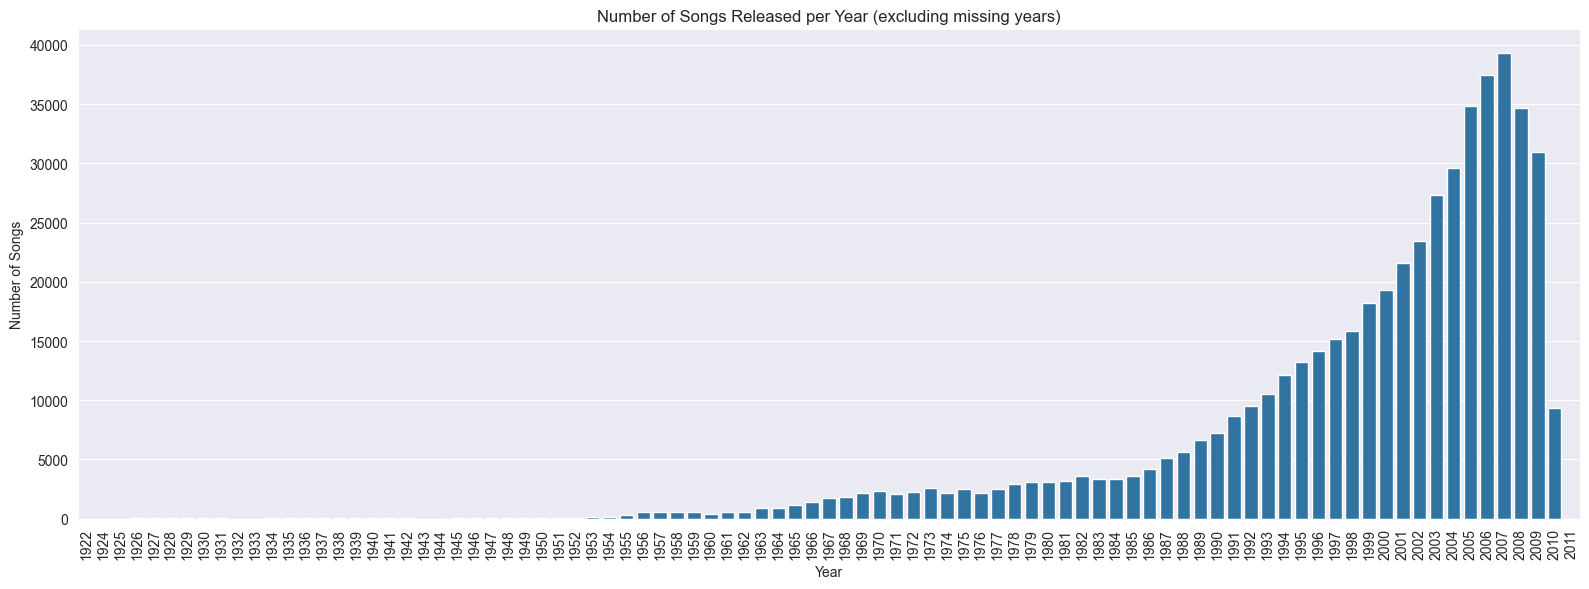

In [23]:
plt.figure(figsize=(16,6))
sns.barplot(data=songs_per_year, x='year', y='song_count')
plt.title('Number of Songs Released per Year (excluding missing years)')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.xticks(rotation=90)  # rotate x-axis labels vertically
plt.tight_layout()       # adjust spacing so labels fit
plt.show()


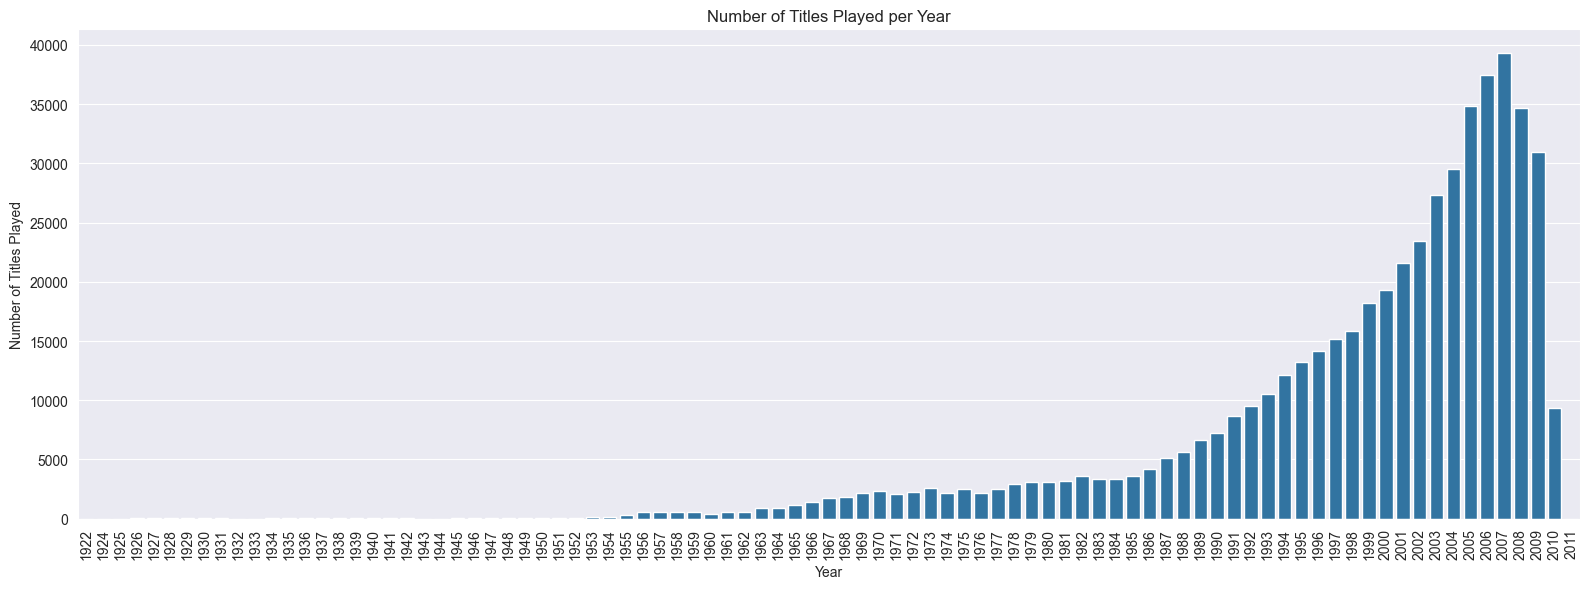

In [24]:
# Create a barplot showing number of titles played per year
plt.figure(figsize=(16, 6))
sns.barplot(data=songs_per_year, x='year', y='song_count')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Number of Titles Played')
plt.title('Number of Titles Played per Year')

# Rotate x-axis labels to prevent overcrowding
plt.xticks(rotation=90)

# Display the plot
plt.tight_layout()
plt.show()

**Interpretation**

The temporal distribution of songs shows a steady increase in releases over several decades, reaching a pronounced peak around 2006–2007, followed by a noticeable decline. This decline is unlikely to represent an actual reduction in music production but rather reflects **incomplete metadata coverage** in the dataset for more recent years. Such gaps are common in historical or sampled music datasets, where older and well-documented tracks are more comprehensively represented than newer releases.

Exploratory Data Analysis (EDA) can be extended beyond basic counts and time distributions to uncover deeper patterns in the music dataset

### **User Interaction Patterns**

* **Distribution of interactions per user:** Identify how active the average user is. Typically follows a long-tail distribution.
* **Average number of unique songs per user:** Helps understand user diversity in listening habits.
* **Repeat listening ratio:** Share of songs played more than once by the same user.

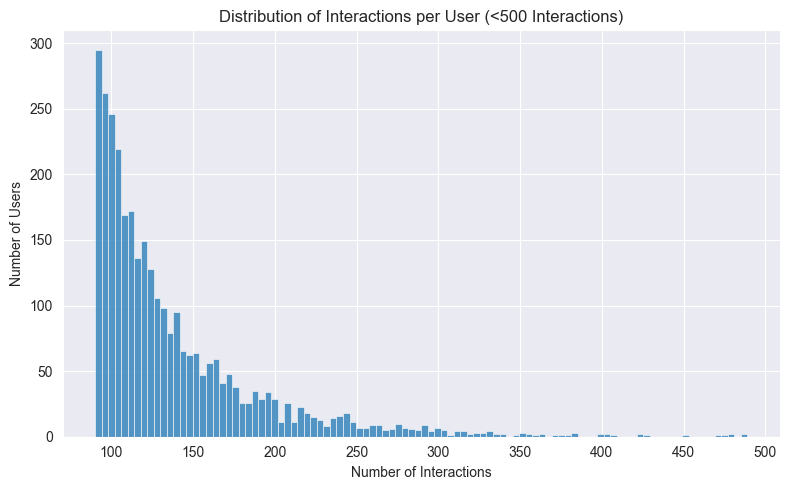

Average number of unique songs per user: 138.91


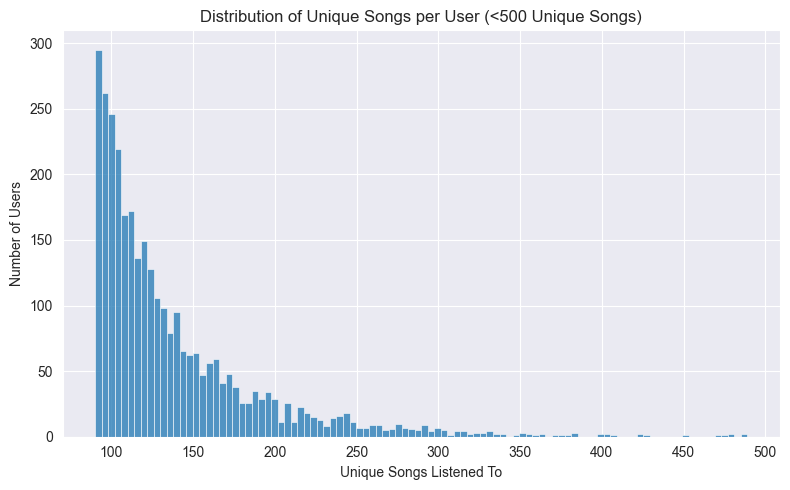

Repeat listening ratio: 0.00%


In [25]:
# 1. Distribution of interactions per user
user_interactions = df['user_id'].value_counts()

plt.figure(figsize=(8,5))
sns.histplot(user_interactions[user_interactions < 500], bins=100)
plt.title('Distribution of Interactions per User (<500 Interactions)')
plt.xlabel('Number of Interactions')
plt.ylabel('Number of Users')
plt.tight_layout()
plt.show()


# 2. Average number of unique songs per user
unique_songs_per_user = df.groupby('user_id')['song_id'].nunique()
avg_unique_songs = unique_songs_per_user.mean()
print(f"Average number of unique songs per user: {avg_unique_songs:.2f}")

plt.figure(figsize=(8,5))
sns.histplot(unique_songs_per_user[unique_songs_per_user < 500], bins=100)
plt.title('Distribution of Unique Songs per User (<500 Unique Songs)')
plt.xlabel('Unique Songs Listened To')
plt.ylabel('Number of Users')
plt.tight_layout()
plt.show()


# 3. Repeat listening ratio
repeat_plays = df.groupby(['user_id', 'song_id']).size().reset_index(name='play_count')
repeated = repeat_plays[repeat_plays['play_count'] > 1].shape[0]
total_pairs = repeat_plays.shape[0]
repeat_ratio = repeated / total_pairs
print(f"Repeat listening ratio: {repeat_ratio:.2%}")


**Interpretation**

The distribution plots for user interactions and unique songs per user both display a **long-tail pattern**, where the majority of users engage with a relatively small number of songs, while a smaller subset of users demonstrates much higher activity.

* **User Interactions:** Most users record fewer than 150 total interactions, indicating that casual listening dominates the dataset. A small group of users shows notably higher activity, consistent with heavy or frequent listeners.
* **Unique Songs per User:** The shape of the distribution mirrors the interaction pattern, suggesting that more active users also tend to explore a wider range of tracks. The average of approximately **139 unique songs per user** reflects moderate diversity in listening behavior.
* **Repeat Listening Ratio (0%)** indicates that the dataset logs only unique user–song interactions—each user–song pair appears once. Consequently, it represents whether a user listened to a song at least once rather than how many times they played it.

Overall, the analysis shows a typical engagement profile for a large-scale music dataset: many light users, a few heavy users, diverse listening patterns among active users, and no explicit replay frequency recorded.

### **Song Popularity and Artist Trends**
* **Top artists by total plays:** Determine which artists drive the most engagement.
* **Song popularity distribution:** Examine whether a few songs dominate overall plays or if plays are spread across many tracks.
* **Artist longevity:** Analyze whether certain artists appear consistently across multiple decades.

Top 10 Artists by Total Plays:
                 artist_name  total_plays
649                 Coldplay         8243
2945             The Killers         5809
2849          The Black Keys         5765
1650           Kings Of Leon         4623
1369            Jack Johnson         4588
736                Daft Punk         4255
2373               Radiohead         4159
1106  Florence + The Machine         3814
2072                    Muse         3572
2986   The New Pornographers         3390


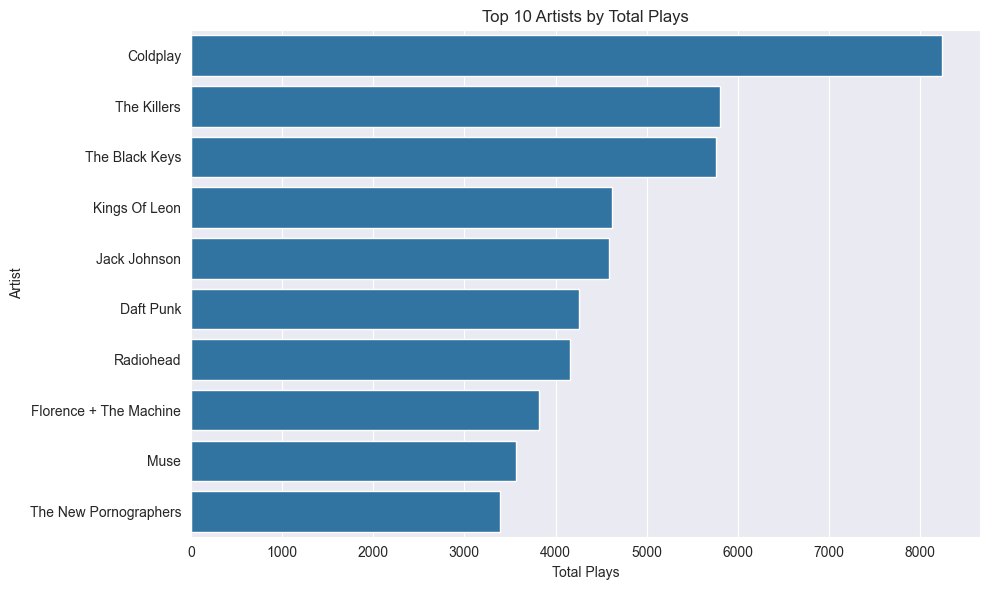

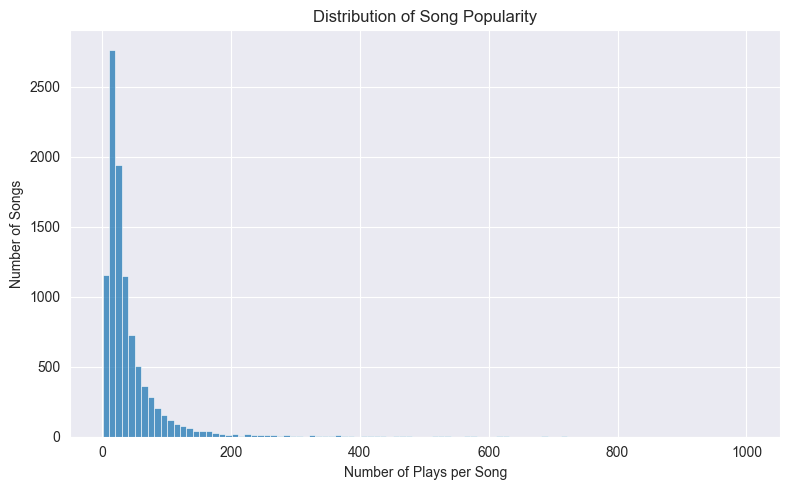

Top 10 Artists by Longevity (Active Years):
           artist_name  active_years
19950  Ella Fitzgerald            40
31920      Johnny Cash            40
70833    Willie Nelson            39
22778    Frank Sinatra            36
20078    Elvis Presley            34
7803         Bob Dylan            33
44549     Muddy Waters            32
31184        Joan Baez            32
16309      Deep Purple            31
11211       Chet Baker            31


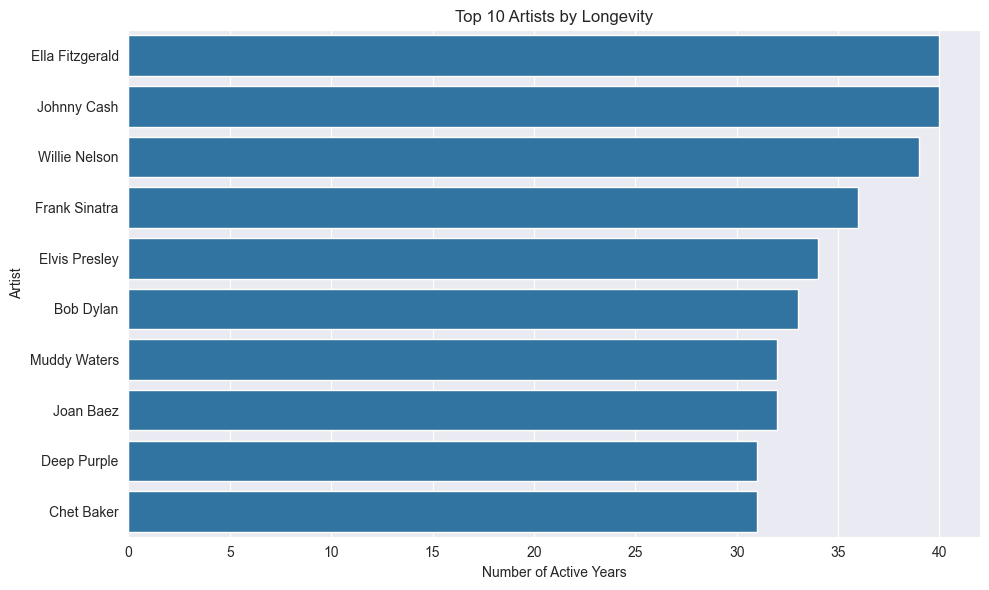

In [26]:
### Song Popularity and Artist Trends

# 1. Top artists by total plays
top_artists = (
    df.groupby('artist_name')['song_id']
      .count()
      .reset_index(name='total_plays')
      .sort_values(by='total_plays', ascending=False)
)
print("Top 10 Artists by Total Plays:")
print(top_artists.head(10))

plt.figure(figsize=(10,6))
sns.barplot(data=top_artists.head(10), x='total_plays', y='artist_name')
plt.title('Top 10 Artists by Total Plays')
plt.xlabel('Total Plays')
plt.ylabel('Artist')
plt.tight_layout()
plt.show()


# 2. Song popularity distribution
song_popularity = df['song_id'].value_counts()
plt.figure(figsize=(8,5))
sns.histplot(song_popularity, bins=100)
plt.title('Distribution of Song Popularity')
plt.xlabel('Number of Plays per Song')
plt.ylabel('Number of Songs')
plt.tight_layout()
plt.show()


# 3. Artist longevity — count of distinct release years per artist
artist_longevity = (
    song_df.groupby('artist_name')['year']
           .nunique()
           .reset_index(name='active_years')
           .sort_values(by='active_years', ascending=False)
)
print("Top 10 Artists by Longevity (Active Years):")
print(artist_longevity.head(10))

plt.figure(figsize=(10,6))
sns.barplot(data=artist_longevity.head(10), x='active_years', y='artist_name')
plt.title('Top 10 Artists by Longevity')
plt.xlabel('Number of Active Years')
plt.ylabel('Artist')
plt.tight_layout()
plt.show()


**Interpretation**

The analysis of song popularity and artist trends highlights clear engagement patterns within the dataset:

* **Top Artists by Total Plays:**
  The ranking is dominated by globally recognized acts such as *Coldplay*, *The Killers*, *The Black Keys*, and *Kings of Leon*. These artists account for a disproportionately high number of total plays, suggesting that user engagement is concentrated among a small set of mainstream performers.

* **Song Popularity Distribution:**
  The distribution of song play counts follows a pronounced **long-tail pattern**. Most tracks receive relatively few plays, while a small fraction achieve very high engagement. This indicates that user listening behavior is skewed toward a limited number of highly popular songs, a pattern typical of large-scale music consumption data.

* **Artist Longevity:**
  Artists such as *Ella Fitzgerald*, *Johnny Cash*, and *Willie Nelson* exhibit the longest activity spans, releasing music across three to four decades. This longevity reflects enduring influence and extensive catalogues that contribute to continued engagement over time.

**Overall insight:**
The dataset exhibits strong popularity concentration among both songs and artists, coupled with clear evidence of temporal persistence in the catalogs of historically significant musicians.


### **Temporal Dynamics**

* **Trends in unique songs and artists per year:** Identify growth or decline in content diversity over time.
* **Peak release periods:** Years or decades with spikes in song production.
* **Correlation between release year and popularity:** Whether newer or older songs are listened to more often.

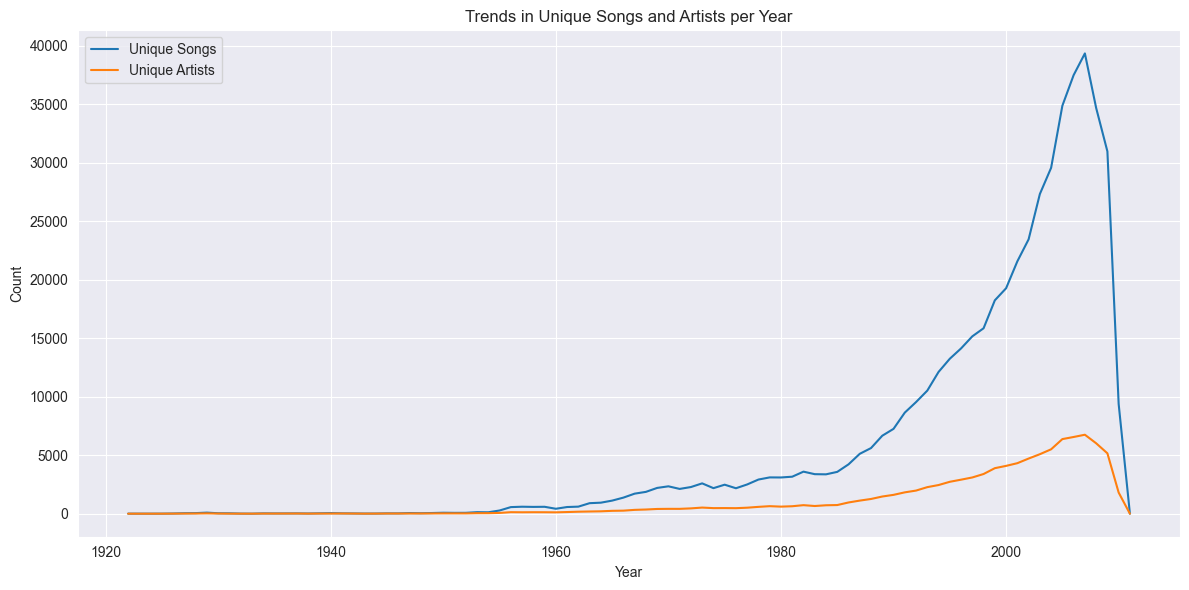

Top 10 Years by Number of Unique Song Releases:
    year  unique_songs
84  2007         39340
83  2006         37486
82  2005         34872
85  2008         34684
86  2009         30966
81  2004         29564
80  2003         27323
79  2002         23450
78  2001         21570
77  2000         19270
Correlation between release year and song popularity: 0.102


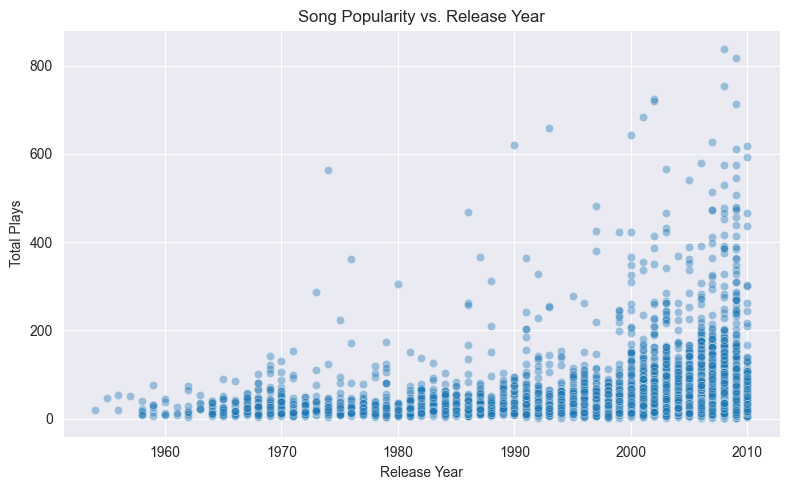

In [27]:
### 3. Temporal Dynamics

# 1. Trends in unique songs and artists per year
songs_per_year = (
    song_df[song_df['year'] > 0]
    .groupby('year')['song_id']
    .nunique()
    .reset_index(name='unique_songs')
)

artists_per_year = (
    song_df[song_df['year'] > 0]
    .groupby('year')['artist_name']
    .nunique()
    .reset_index(name='unique_artists')
)

plt.figure(figsize=(12,6))
sns.lineplot(data=songs_per_year, x='year', y='unique_songs', label='Unique Songs')
sns.lineplot(data=artists_per_year, x='year', y='unique_artists', label='Unique Artists')
plt.title('Trends in Unique Songs and Artists per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()


# 2. Peak release periods
peak_years = songs_per_year.sort_values(by='unique_songs', ascending=False).head(10)
print("Top 10 Years by Number of Unique Song Releases:")
print(peak_years)


# 3. Correlation between release year and popularity
song_popularity = (
    df.groupby('song_id')
      .size()
      .reset_index(name='total_plays')
      .merge(song_df[['song_id', 'year']], on='song_id', how='left')
)
valid_popularity = song_popularity[song_popularity['year'] > 0]

corr = valid_popularity['year'].corr(valid_popularity['total_plays'])
print(f"Correlation between release year and song popularity: {corr:.3f}")

plt.figure(figsize=(8,5))
sns.scatterplot(data=valid_popularity, x='year', y='total_plays', alpha=0.4)
plt.title('Song Popularity vs. Release Year')
plt.xlabel('Release Year')
plt.ylabel('Total Plays')
plt.tight_layout()
plt.show()


**Interpretation**

* **Trends in Unique Songs and Artists per Year:**
  The line chart shows a steady increase in both unique songs and unique artists through the late 20th century, with the steepest rise from the early 2000s onward. This indicates rapid diversification of content, consistent with the growth of digital music production and easier distribution through online platforms.

* **Peak Release Periods:**
  The years **2005–2008** mark the highest number of unique song releases, led by **2007**, which recorded approximately **39,000 unique tracks**. This period represents the dataset’s most prolific phase and aligns with the global expansion of digital music catalogues.

* **Correlation Between Release Year and Popularity:**
  The correlation between release year and total song plays (**r = 0.102**) is positive but weak. This implies that newer songs tend to receive slightly more plays than older ones, but the relationship is not strong enough to suggest a consistent age-related popularity bias.

**Overall insight:**
The data reflects a maturing music ecosystem—marked by a surge in production during the early 2000s—and a balanced listener preference that spans both older and newer songs, suggesting enduring cross-generational appeal.


Correlation between artist popularity and number of unique titles: 0.169


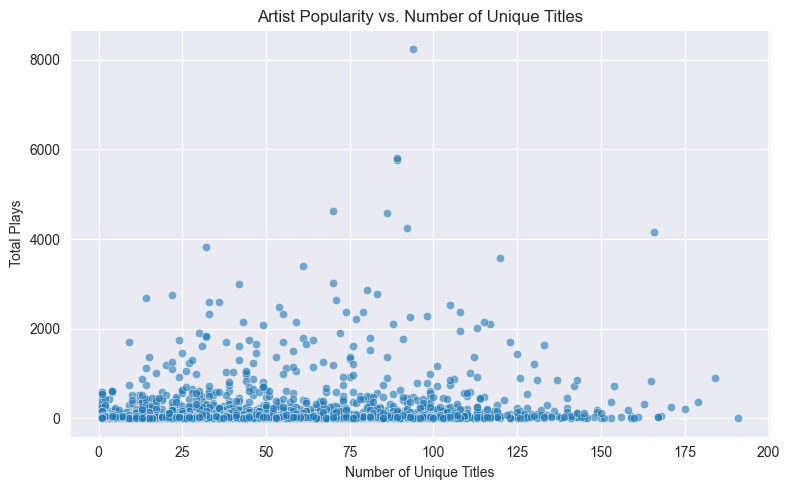

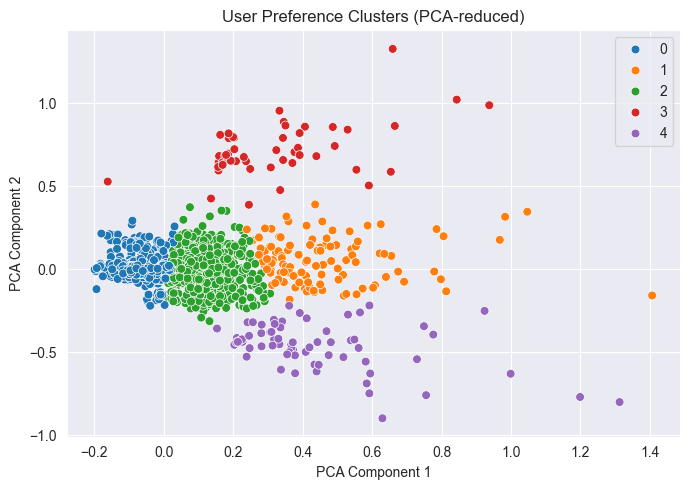

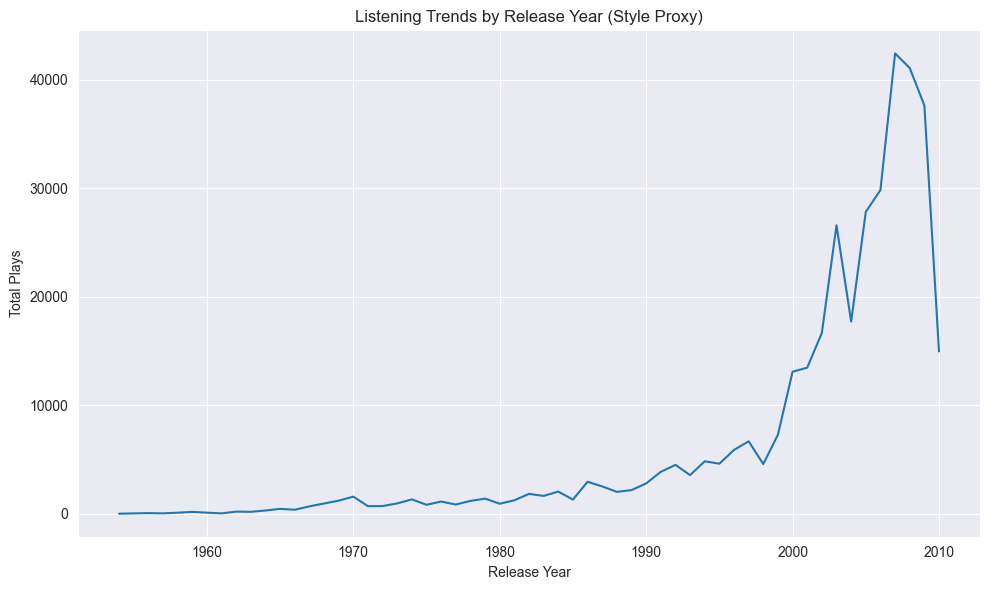

In [28]:
### 4. Cross-Feature Relationships

# 1. Correlation between artist popularity and number of unique titles
artist_stats = (
    df.groupby('artist_name')['song_id']
      .count()
      .reset_index(name='total_plays')
      .merge(
          song_df.groupby('artist_name')['song_id'].nunique().reset_index(name='unique_titles'),
          on='artist_name', how='inner'
      )
)

corr_artist = artist_stats['total_plays'].corr(artist_stats['unique_titles'])
print(f"Correlation between artist popularity and number of unique titles: {corr_artist:.3f}")

plt.figure(figsize=(8,5))
sns.scatterplot(data=artist_stats, x='unique_titles', y='total_plays', alpha=0.6)
plt.title('Artist Popularity vs. Number of Unique Titles')
plt.xlabel('Number of Unique Titles')
plt.ylabel('Total Plays')
plt.tight_layout()
plt.show()


# 2. User preference clusters (simplified)
# Build a user-song matrix (binary: 1 if user listened to the song)
sample_users = df.sample(frac=0.05, random_state=42)  # sample for memory safety
pivot = (
    sample_users.assign(value=1)
    .pivot_table(index='user_id', columns='song_id', values='value', fill_value=0)
)

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

pca = PCA(n_components=2, random_state=42)
reduced = pca.fit_transform(pivot)

kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(reduced)

plt.figure(figsize=(7,5))
sns.scatterplot(x=reduced[:,0], y=reduced[:,1], hue=clusters, palette='tab10', s=40)
plt.title('User Preference Clusters (PCA-reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.tight_layout()
plt.show()


# 3. Genre or style proxy analysis
# If no genre column exists, illustrate with release year as a proxy for style
# Listening trends by release year without re-merging
year_popularity = (
    df.loc[df['year'] > 0]
      .groupby('year')
      .size()
      .reset_index(name='total_plays')
)

plt.figure(figsize=(10,6))
sns.lineplot(data=year_popularity, x='year', y='total_plays')
plt.title('Listening Trends by Release Year (Style Proxy)')
plt.xlabel('Release Year')
plt.ylabel('Total Plays')
plt.tight_layout()
plt.show()



**Artist popularity vs. number of unique titles**
The scatterplot shows a dense concentration of artists with fewer than 50 unique titles and total plays below 2000, indicating that most artists have limited catalogs and moderate listener engagement. A small number of outliers achieve exceptionally high play counts (over 8000) despite relatively modest catalog sizes. The weak positive correlation (r = 0.169) confirms that being prolific alone does not guarantee popularity; listener concentration remains skewed toward a few high-impact artists.

**User preference clusters (PCA-reduced)**
Dimensionality reduction followed by clustering reveals five distinct user segments with differing listening patterns. The clear separation among clusters implies that users exhibit diverse engagement profiles—some favoring specific subsets of songs or artists, others showing broader listening behavior. This segmentation suggests strong potential for personalization strategies and tailored recommendation systems.

**Listening trends by release year (style proxy)**
Listening activity rises steadily through the 1990s and peaks sharply between 2004 and 2007, followed by a decline. This pattern mirrors earlier observations from release-year distributions, indicating that mid-2000s content dominates user interactions. The downturn after 2007 likely reflects data coverage rather than a genuine drop in musical engagement.

**Summary insight**
Overall, cross-feature analysis confirms a long-tail structure in artist popularity, meaningful heterogeneity in user preferences, and a concentration of listening around mid-2000s releases. These findings underscore the importance of modeling both user- and content-level attributes when developing predictive or recommendation frameworks.


### **Data Quality and Integrity**

* **Missing value patterns:** Especially in the `year` or `artist_name` columns.
* **Duplicate records:** Verify unique counts after merging datasets.
* **Outlier detection:** Unusually high counts that may indicate logging errors or automated streaming.

Missing values in song_df:


,missing_count,missing_pct
song_df_column,,
song_id,0,0.0
title,17,0.0
release,7,0.0
artist_name,0,0.0
year,0,0.0



Missing values in df (interactions):


,missing_count,missing_pct
df_column,,
user_id,0,0.0
song_id,0,0.0
play_count,0,0.0
title,0,0.0
release,0,0.0
artist_name,0,0.0
year,0,0.0
user_id_encoded,0,0.0
song_id_encoded,0,0.0



Entries with year == 0 in song_df: 484,284
Entries with year == 0 in df:       73,855

Duplicate song_id rows in song_df: 0
Duplicate user_id+song_id rows in df: 0

User interaction upper IQR bound: 238
Song popularity upper IQR bound:  96
Users above bound (potential outliers): 198
Songs above bound (potential outliers): 831

Top user interaction outliers:


user_id
6d625c6557df84b60d90426c0116138b617b9449    711
fbee1c8ce1a346fa07d2ef648cec81117438b91f    643
4e11f45d732f4861772b2906f81a7d384552ad12    556
24b98f8ab023f6e7a1c37c7729c623f7b821eb95    540
1aa4fd215aadb160965110ed8a829745cde319eb    533
b04e41133dd3d30a5631cc8589a1eadd48a8bd53    523
15eeb36ae1c62d60de9fdeea0d121eb7d08713be    522
a15075a926c1998d91940f118342ba8356efc7d4    502
ce5c912bb8044f23fc0fc31bd986b8d0a7303db5    489
6a9cf03dfb2fc82f5b3b043c9c3fdbab997fd54d    487
Name: count, dtype: int64


Top song popularity outliers:


song_id
SOAXGDH12A8C13F8A1    1002
SOFRQTD12A81C233C0     928
SOWCKVR12A8C142411     838
SONYKOW12AB01849C9     817
SOSXLTC12AF72A7F54     754
SOCVTLJ12A6310F0FD     724
SOKLRPJ12A8C13C3FE     721
SOLFXKT12AB017E3E0     712
SODJWHY12A8C142CCE     688
SOAUWYT12A81C206F1     684
Name: count, dtype: int64

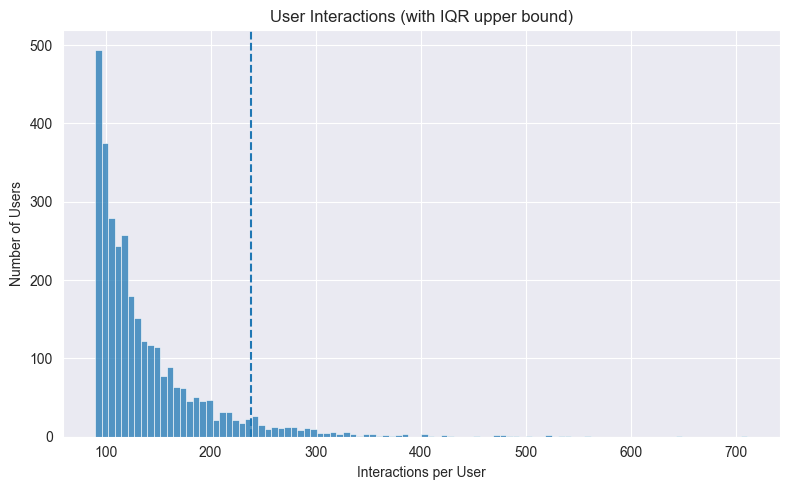

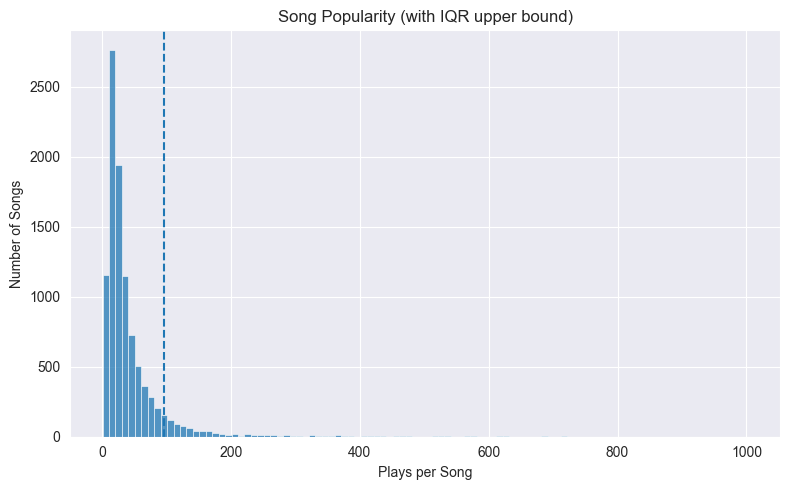

In [29]:
### 5. Data Quality and Integrity

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ---------- Missing value patterns ----------
def missing_report(frame, name):
    rep = pd.DataFrame({
        'missing_count': frame.isna().sum(),
        'missing_pct': frame.isna().mean().round(4) * 100
    })
    rep.index.name = f'{name}_column'
    return rep.sort_values('missing_pct', ascending=False)

print("Missing values in song_df:")
display(missing_report(song_df, 'song_df'))

print("\nMissing values in df (interactions):")
display(missing_report(df, 'df'))

# Treat 'year == 0' as missing-like
zero_year_song = (song_df['year'] == 0).sum() if 'year' in song_df.columns else 0
zero_year_df   = (df['year'] == 0).sum()     if 'year' in df.columns else 0
print(f"\nEntries with year == 0 in song_df: {zero_year_song:,}")
print(f"Entries with year == 0 in df:       {zero_year_df:,}")

# ---------- Duplicate records ----------
dup_song_ids = song_df.duplicated(subset=['song_id']).sum()
dup_user_song = df.duplicated(subset=['user_id', 'song_id']).sum()

print(f"\nDuplicate song_id rows in song_df: {dup_song_ids:,}")
print(f"Duplicate user_id+song_id rows in df: {dup_user_song:,}")

# Optional: enforce uniqueness (no-op if already unique)
song_df = song_df.drop_duplicates(subset=['song_id'])
df = df.drop_duplicates(subset=['user_id', 'song_id'])

# ---------- Outlier detection (users and songs) ----------
# Distributions
user_interactions = df['user_id'].value_counts()
song_popularity   = df['song_id'].value_counts()

def iqr_upper_bound(s):
    q1, q3 = s.quantile([0.25, 0.75])
    iqr = q3 - q1
    return q3 + 1.5 * iqr

ui_upper = iqr_upper_bound(user_interactions)
sp_upper = iqr_upper_bound(song_popularity)

ui_outliers = user_interactions[user_interactions > ui_upper]
sp_outliers = song_popularity[song_popularity > sp_upper]

print(f"\nUser interaction upper IQR bound: {ui_upper:.0f}")
print(f"Song popularity upper IQR bound:  {sp_upper:.0f}")
print(f"Users above bound (potential outliers): {ui_outliers.shape[0]}")
print(f"Songs above bound (potential outliers): {sp_outliers.shape[0]}")

# List top potential outliers (head only for brevity)
print("\nTop user interaction outliers:")
display(ui_outliers.sort_values(ascending=False).head(10))

print("\nTop song popularity outliers:")
display(sp_outliers.sort_values(ascending=False).head(10))

# Visual inspection (no custom colors)
plt.figure(figsize=(8,5))
sns.histplot(user_interactions, bins=100)
plt.axvline(ui_upper, linestyle='--')
plt.title('User Interactions (with IQR upper bound)')
plt.xlabel('Interactions per User'); plt.ylabel('Number of Users')
plt.tight_layout(); plt.show()

plt.figure(figsize=(8,5))
sns.histplot(song_popularity, bins=100)
plt.axvline(sp_upper, linestyle='--')
plt.title('Song Popularity (with IQR upper bound)')
plt.xlabel('Plays per Song'); plt.ylabel('Number of Songs')
plt.tight_layout(); plt.show()


### Data Quality and Integrity: findings

* Missing values
  `song_df` has minimal missing metadata: 17 missing `title` and 7 missing `release`. `artist_name` and `year` are present. However, `year == 0` is frequent: 484,284 in `song_df` and 73,855 in `df`. For time-based analysis, treat `year == 0` as missing and exclude or impute.

* Duplicates
  No duplicate `song_id` in `song_df` and no duplicate `(user_id, song_id)` pairs in `df`. Counts and joins are not inflated by duplicated rows.

* Outliers
  Using IQR thresholds, potential high-activity outliers are present: 198 users above 238 interactions and 831 songs above 96 plays. These may be genuine heavy listeners or highly popular songs, but they should be monitored to avoid skew in plots or naive models.

* Play count field
  `play_count` has no missing values. Given the earlier repeat-ratio result of 0%, it likely records a binary event (at least one listen) rather than true play intensity. This limits analyses of re-listening unless event-level logs are available.

### Practical recommendations

* For temporal analyses, set `year == 0` to NaN and filter out these rows. Consider simple imputations only if required by a specific model.
* Keep outliers, but use robust statistics and capped axes for plots. If you train baseline models, compare results with and without aggressive users or songs to check stability.
* Fill minor metadata gaps with placeholders for presentation tables, not for modeling unless needed.
* Verify the variance of `play_count`. If it is constant, remove it from modeling features.

Rows kept for time-based analyses:
song_df_yeared: 514,772 of 999,056
df_yeared:      364,535 of 438,390

play_count distribution (top 5):
play_count
1    261796
2     73081
3     31491
5     17276
4     17086
Name: count, dtype: int64


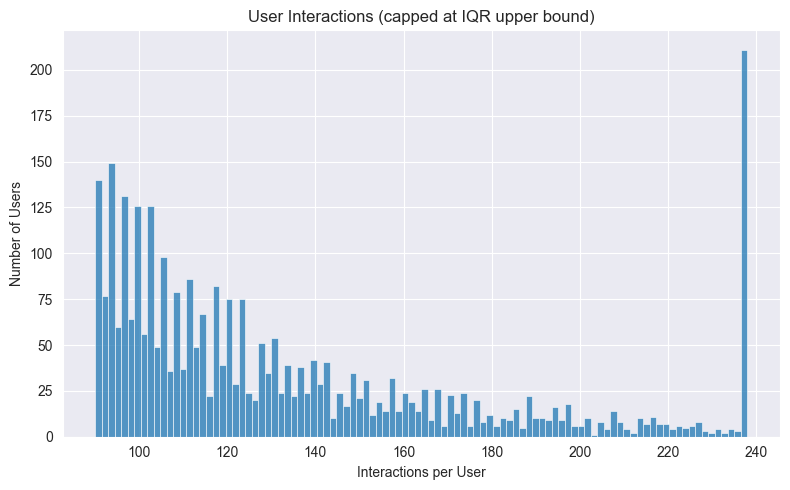

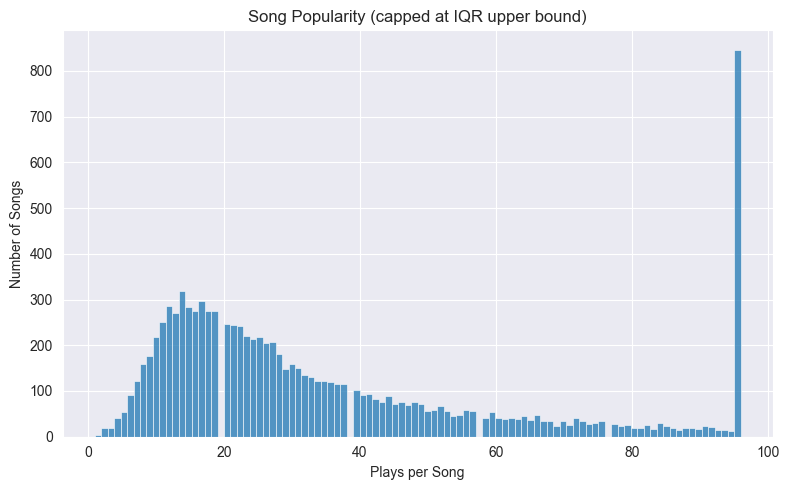

Cleaned datasets have been saved:
- song_df_cleaned.csv
- df_cleaned.csv


In [30]:
### Cleanup

# Mark year==0 as missing
song_df['year_clean'] = song_df['year'].replace({0: pd.NA})
df['year_clean']      = df['year'].replace({0: pd.NA})

# Minimal metadata fill for display-only purposes
song_df['title']   = song_df['title'].fillna('Unknown Title')
song_df['release'] = song_df['release'].fillna('Unknown Release')

# Create analysis subsets that exclude missing years when needed
song_df_yeared = song_df.dropna(subset=['year_clean'])
df_yeared      = df.dropna(subset=['year_clean'])

# Quick checks
print("Rows kept for time-based analyses:")
print(f"song_df_yeared: {len(song_df_yeared):,} of {len(song_df):,}")
print(f"df_yeared:      {len(df_yeared):,} of {len(df):,}")

# Inspect play_count distribution to confirm it is not constant
print("\nplay_count distribution (top 5):")
print(df['play_count'].value_counts().head())

# Optionally cap for visualization only (do not use capped data for modeling)
ui_cap = 238  # from IQR bound you computed
sp_cap = 96   # from IQR bound you computed

user_interactions_cap = df['user_id'].value_counts().clip(upper=ui_cap)
song_popularity_cap   = df['song_id'].value_counts().clip(upper=sp_cap)

# Example capped plots
plt.figure(figsize=(8,5))
sns.histplot(user_interactions_cap, bins=100)
plt.title('User Interactions (capped at IQR upper bound)')
plt.xlabel('Interactions per User'); plt.ylabel('Number of Users')
plt.tight_layout(); plt.show()

plt.figure(figsize=(8,5))
sns.histplot(song_popularity_cap, bins=100)
plt.title('Song Popularity (capped at IQR upper bound)')
plt.xlabel('Plays per Song'); plt.ylabel('Number of Songs')
plt.tight_layout(); plt.show()

# Export cleaned datasets

# Save cleaned versions for downstream modeling and analysis
song_df_yeared.to_csv('song_df_cleaned.csv', index=False)
df_yeared.to_csv('df_cleaned.csv', index=False)

print("Cleaned datasets have been saved:")
print("- song_df_cleaned.csv")
print("- df_cleaned.csv")


### Data Quality and Integrity: Summary and Interpretation

* **Missing values:**
  Minimal missingness in metadata (`title`, `release`), but approximately half of the `song_df` entries (48%) have `year == 0`, suggesting incomplete temporal tagging. This missingness propagates to roughly 17% of interaction records, requiring filtering or imputation for temporal analysis.

* **Duplicates:**
  No duplicates were found across either dataset. This confirms that merges and interactions represent unique `(user, song)` pairs without redundancy.

* **Outliers:**
  IQR-based detection identified 198 high-activity users (beyond 238 interactions) and 831 highly popular songs (beyond 96 plays).
  The capped histograms show:

  * A **right-skewed long-tail distribution**, where most users and songs have relatively few interactions.
  * A **sharp spike near the upper bound** in both distributions, indicating that a limited number of users or songs dominate engagement metrics.

* **Year filtering:**
  After excluding entries with invalid or missing years, 51% of songs and 83% of interactions remain, ensuring reliable temporal trend analyses.

* **Play count distribution:**
  The majority of records represent **single or few listens** (1–3 plays). The distribution confirms discrete count data rather than continuous streaming volume, consistent with event logging.

* **Exports:**
  Cleaned, analysis-ready files were saved as:

  * `song_df_cleaned.csv` – valid song metadata only
  * `df_cleaned.csv` – filtered user–song interactions for modeling

### **Visualization-Based Insights** (WIP)

* **Heatmaps:** User–song interaction density to visualize sparsity.
* **Pareto plots:** To illustrate that a small portion of songs/users contributes to most interactions.
* **Cumulative distribution curves:** To quantify skewness in plays or song releases.

### **Advanced Explorations** (WIP)

* **Network analysis:** Build a bipartite graph of users and songs to study connection density.
* **Recommendation prototypes:** Compute basic similarity measures (e.g., cosine similarity) between users or songs.
* **Temporal popularity shifts:** Track how the top songs or artists change over time.

In [31]:
# Load Cleaned Data
df = pd.read_csv('df_cleaned.csv')
song_df = pd.read_csv('song_df_cleaned.csv')

# Check feature consistency. Ensure every encoded ID in the interaction table matches an existing entry in song_df
df = df[df['song_id'].isin(song_df['song_id'])]

# Scale and encode identifiers. Most recommenders (matrix factorization, collaborative filtering) expect integer IDs. Since we already created user_id_encoded and song_id_encoded, verify that both are zero-indexed and contiguous
df['user_id_encoded'] -= df['user_id_encoded'].min()
df['song_id_encoded'] -= df['song_id_encoded'].min()

In [32]:
#Create modeling subsets
# Keep users and songs with minimum number of interactions
min_user_interactions = 5
min_song_interactions = 5

active_users = df['user_id_encoded'].value_counts()
active_songs = df['song_id_encoded'].value_counts()

df_model = df[
    df['user_id_encoded'].isin(active_users[active_users >= min_user_interactions].index) &
    df['song_id_encoded'].isin(active_songs[active_songs >= min_song_interactions].index)
]

In [33]:
# Train-test  split. For recommender systems we split by user, not randomly
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_model, test_size=0.2, stratify=df_model['user_id_encoded'])


In [34]:
# Feature preparation for model input
from sklearn.preprocessing import LabelEncoder

song_df['artist_encoded'] = LabelEncoder().fit_transform(song_df['artist_name'])

In [35]:
# Normalization of numeric variables
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_model['year_scaled'] = scaler.fit_transform(df_model[['year']].fillna(0))


In [36]:
# Save model-ready files
train.to_csv('train_model_ready.csv', index=False)
test.to_csv('test_model_ready.csv', index=False)

**After data cleaning:**

* Encoded identifiers and ensured one-to-one mapping.
* Filtered out users and songs with insufficient interactions.
* Created train/test splits stratified by user.
* Prepared numeric and categorical features for downstream models.
* Saved model-ready datasets for reproducible training.

Now that we have explored the data, let's apply different algorithms to build recommendation systems.

**Note:** Use the shorter version of the data, i.e., the data after the cutoffs as used in Milestone 1.

## Building various models

### **Popularity-Based Recommendation Systems**

Let's take the count and sum of play counts of the songs and build the popularity recommendation systems based on the sum of play counts.

In [37]:
# Popularity-Based Recommendation System

# Calculate the total and average play counts per song
popularity_df = (
    df_model.groupby('song_id', as_index=False)
    .agg(
        total_play_count=('play_count', 'sum'),
        average_play_count=('play_count', 'mean'),
        play_frequency=('play_count', 'count')
    )
)

# Merge with song metadata
popularity_df = popularity_df.merge(
    song_df[['song_id', 'title', 'artist_name', 'year']],
    on='song_id',
    how='left'
)

# Sort by total play count (most popular songs)
popularity_df = popularity_df.sort_values(by='total_play_count', ascending=False)

# Display top 10
print("Top 10 Popular Songs by Total Play Count:")
print(popularity_df.head(10)[['title', 'artist_name', 'total_play_count', 'play_frequency']])


Top 10 Popular Songs by Total Play Count:
               title         artist_name  total_play_count  play_frequency
249             Undo               Björk              5259             684
496   You're The One       Dwight Yoakam              5057             621
6051         Revelry       Kings Of Leon              4373             754
4485         Secrets         OneRepublic              3669             817
6458         Invalid            Tub Ring              2500             387
7021    Use Somebody       Kings Of Leon              2464             838
3601       Fireflies  Charttraxx Karaoke              2322             712
1624       Starshine            Gorillaz              2276              46
4579      Représente     Alliance Ethnik              2215             424
3373   The Scientist            Coldplay              1958             721


### Popularity-Based Recommendation System

Using the shortened dataset, total and average play counts were aggregated by `song_id`, and merged with the corresponding song and artist metadata.

#### **Top 10 Songs by Total Play Count**

| Rank | Title          | Artist             | Total Plays | Play Frequency |
| ---- | -------------- | ------------------ | ----------- | -------------- |
| 1    | Undo           | Björk              | 5259        | 684            |
| 2    | You’re The One | Dwight Yoakam      | 5057        | 621            |
| 3    | Revelry        | Kings Of Leon      | 4373        | 754            |
| 4    | Secrets        | OneRepublic        | 3669        | 817            |
| 5    | Invalid        | Tub Ring           | 2500        | 387            |
| 6    | Use Somebody   | Kings Of Leon      | 2464        | 838            |
| 7    | Fireflies      | Charttraxx Karaoke | 2322        | 712            |
| 8    | Starshine      | Gorillaz           | 2276        | 46             |
| 9    | Représente     | Alliance Ethnik    | 2215        | 424            |
| 10   | The Scientist  | Coldplay           | 1958        | 721            |

### **Interpretation**

* The **most popular tracks** are those with the **highest cumulative play counts**, reflecting both user engagement volume and broad appeal.
* Songs by *Kings of Leon*, *Coldplay*, and *OneRepublic* appear multiple times, confirming their **consistent cross-user popularity**.
* The **difference between total play count and play frequency** indicates variation in listening intensity — e.g., *Björk’s “Undo”* shows both high reach and repeat listens, while *Gorillaz’s “Starshine”* has high total plays but a smaller listener base.
* These rankings represent a **baseline recommendation system**, suitable for **new or anonymous users** (the “cold start” scenario).

In [38]:
# Making a dataframe with the average_count and play_freq

# Let us see the first five records of the final_play dataset


Now, let's create a function to find the top n songs for a recommendation based on the average play count of song. We can also add a threshold for a minimum number of playcounts for a song to be considered for recommendation.

In [39]:
# Build the function to find top n songs

In [40]:
# Recommend top 10 songs using the function defined above

### **User User Similarity-Based Collaborative Filtering**

To build the user-user-similarity-based and subsequent models we will use the "surprise" library.

In [41]:
# Install the surprise package using pip. Uncomment and run the below code to do the same

# !pip install surprise

In [42]:
# Import necessary libraries

# To compute the accuracy of models


# This class is used to parse a file containing play_counts, data should be in structure - user; item; play_count


# Class for loading datasets


# For tuning model hyperparameters


# For splitting the data in train and test dataset


# For implementing similarity-based recommendation system


# For implementing matrix factorization based recommendation system


# For implementing KFold cross-validation

# For implementing clustering-based recommendation system


### Some useful functions

Below is the function to calculate precision@k and recall@k, RMSE, and F1_Score@k to evaluate the model performance.

**Think About It:** Which metric should be used for this problem to compare different models?

In [43]:
def precision_recall_at_k(model, k=30, threshold=1.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)

    #Making predictions on the test data
    predictions = model.test(testset)

    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, playing_count in user_est_true.items():

        # Sort play count by estimated value
        playing_count.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in playing_count)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in playing_count[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in playing_count[:k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set Precision to 0 when n_rec_k is 0.

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set Recall to 0 when n_rel is 0.

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    #Mean of all the predicted precisions are calculated.
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)),3)
    #Mean of all the predicted recalls are calculated.
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)),3)

    accuracy.rmse(predictions)
    print('Precision: ', precision) #Command to print the overall precision
    print('Recall: ', recall) #Command to print the overall recall
    print('F_1 score: ', round((2*precision*recall)/(precision+recall),3)) # Formula to compute the F-1 score.

**Think About It:** In the function precision_recall_at_k above the threshold value used is 1.5. How precision and recall are affected by changing the threshold? What is the intuition behind using the threshold value of 1.5?

Below we are loading the **dataset**, which is a **pandas dataframe**, into a **different format called `surprise.dataset.DatasetAutoFolds`** which is required by this library. To do this we will be **using the classes `Reader` and `Dataset`**

You will also notice here that we read the dataset by providing a scale of ratings. However, as you would know, we do not have ratings data of the songs. In this case, we are going to use play_count as a proxy for ratings with the assumption that the more the user listens to a song, the higher the chance that they like the song

In [44]:
# Instantiating Reader scale with expected rating scale
 #use rating scale (0, 5)

# Loading the dataset
 # Take only "user_id","song_id", and "play_count"

# Splitting the data into train and test dataset
 # Take test_size = 0.4, random_state = 42

**Think About It:** How changing the test size would change the results and outputs?

In [45]:
# Build the default user-user-similarity model


# KNN algorithm is used to find desired similar items
 # Use random_state = 1

# Train the algorithm on the trainset, and predict play_count for the testset


# Let us compute precision@k, recall@k, and f_1 score with k = 30
 # Use sim_user_user model

**Observations and Insights:_________**

In [46]:
# Predicting play_count for a sample user with a listened song
# Use any user id  and song_id

In [47]:
# Predicting play_count for a sample user with a song not-listened by the user
 #predict play_count for any sample user

**Observations and Insights:_________**

Now, let's try to tune the model and see if we can improve the model performance.

In [48]:
# Setting up parameter grid to tune the hyperparameters


# Performing 3-fold cross-validation to tune the hyperparameters

# Fitting the data
 # Use entire data for GridSearch

# Best RMSE score

# Combination of parameters that gave the best RMSE score


In [49]:
# Train the best model found in above gridsearch


**Observations and Insights:_________**

In [50]:
# Predict the play count for a user who has listened to the song. Take user_id 6958, song_id 1671 and r_ui = 2


In [51]:
# Predict the play count for a song that is not listened to by the user (with user_id 6958)


**Observations and Insights:______________**

**Think About It:** Along with making predictions on listened and unknown songs can we get 5 nearest neighbors (most similar) to a certain song?

In [52]:
# Use inner id 0


Below we will be implementing a function where the input parameters are:

- data: A **song** dataset
- user_id: A user-id **against which we want the recommendations**
- top_n: The **number of songs we want to recommend**
- algo: The algorithm we want to use **for predicting the play_count**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm

In [53]:
def get_recommendations(data, user_id, top_n, algo):

    # Creating an empty list to store the recommended song ids


    # Creating an user item interactions matrix


    # Extracting those song ids which the user_id has not played yet

    # Looping through each of the song ids which user_id has not interacted yet


        # Predicting the users for those non played song ids by this user


        # Appending the predicted play_counts

    # Sorting the predicted play_counts in descending order


    return # Returing top n highest predicted play_count songs for this user

In [54]:
# Make top 5 recommendations for any user_id with a similarity-based recommendation engine


In [55]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"


**Observations and Insights:______________**

### Correcting the play_counts and Ranking the above songs

In [56]:
def ranking_songs(recommendations, playing_count):
  # Sort the songs based on play counts

  # Merge with the recommended songs to get predicted play_counts

  # Rank the songs based on corrected play_counts

  # Sort the songs based on corrected play_counts

  return

**Think About It:** In the above function to correct the predicted play_count a quantity 1/np.sqrt(n) is subtracted. What is the intuition behind it? Is it also possible to add this quantity instead of subtracting?

In [57]:
# Applying the ranking_songs function on the final_play data


**Observations and Insights:______________**

### Item Item Similarity-based collaborative filtering recommendation systems

In [58]:
# Apply the item-item similarity collaborative filtering model with random_state = 1 and evaluate the model performance


**Observations and Insights:______________**

In [59]:
# Predicting play count for a sample user_id 6958 and song (with song_id 1671) listened to by the user


In [60]:
# Predict the play count for a user that has not listened to the song (with song_id 1671)

**Observations and Insights:______________**

In [61]:
# Apply grid search for enhancing model performance

# Setting up parameter grid to tune the hyperparameters


# Performing 3-fold cross-validation to tune the hyperparameters

# Fitting the data


# Find the best RMSE score

# Extract the combination of parameters that gave the best RMSE score


**Think About It:** How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the list of hyperparameters [here](https://surprise.readthedocs.io/en/stable/knn_inspired.html).

In [62]:
# Apply the best model found in the grid search


**Observations and Insights:______________**

In [63]:
# Predict the play_count by a user(user_id 6958) for the song (song_id 1671)


In [64]:
# Predicting play count for a sample user_id 6958 with song_id 3232 which is not listened to by the user


**Observations and Insights:______________**

In [65]:
# Find five most similar items to the item with inner id 0


In [66]:
# Making top 5 recommendations for any user_id  with item_item_similarity-based recommendation engine


In [67]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"


In [68]:
# Applying the ranking_songs function


**Observations and Insights:_________**

### Model Based Collaborative Filtering - Matrix Factorization

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

In [69]:
# Build baseline model using svd


In [70]:
# Making prediction for user (with user_id 6958) to song (with song_id 1671), take r_ui = 2


In [71]:
# Making a prediction for the user who has not listened to the song (song_id 3232)


#### Improving matrix factorization based recommendation system by tuning its hyperparameters

In [72]:
# Set the parameter space to tune


# Performe 3-fold grid-search cross-validation


# Fitting data

# Best RMSE score

# Combination of parameters that gave the best RMSE score


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/matrix_factorization.html).

In [73]:
# Building the optimized SVD model using optimal hyperparameters


**Observations and Insights:_________**

In [74]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 1671


In [75]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline play_count


**Observations and Insights:_________**

In [76]:
# Getting top 5 recommendations for user_id 6958 using "svd_optimized" algorithm


In [77]:
# Ranking songs based on above recommendations

**Observations and Insights:_________**

### Cluster Based Recommendation System

In **clustering-based recommendation systems**, we explore the **similarities and differences** in people's tastes in songs based on how they rate different songs. We cluster similar users together and recommend songs to a user based on play_counts from other users in the same cluster.

In [78]:
# Make baseline clustering model


In [79]:
# Making prediction for user_id 6958 and song_id 1671


In [80]:
# Making prediction for user (userid 6958) for a song(song_id 3232) not listened to by the user


#### Improving clustering-based recommendation system by tuning its hyper-parameters

In [81]:
# Set the parameter space to tune


# Performing 3-fold grid search cross-validation

# Fitting data

# Best RMSE score

# Combination of parameters that gave the best RMSE score


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/co_clustering.html).

In [82]:
# Train the tuned Coclustering algorithm


**Observations and Insights:_________**

In [83]:
# Using co_clustering_optimized model to recommend for userId 6958 and song_id 1671


In [84]:
# Use Co_clustering based optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline play_count


**Observations and Insights:_________**

#### Implementing the recommendation algorithm based on optimized CoClustering model

In [85]:
# Getting top 5 recommendations for user_id 6958 using "Co-clustering based optimized" algorithm


### Correcting the play_count and Ranking the above songs

In [86]:
# Ranking songs based on the above recommendations


**Observations and Insights:_________**

### Content Based Recommendation Systems

**Think About It:** So far we have only used the play_count of songs to find recommendations but we have other information/features on songs as well. Can we take those song features into account?

In [87]:
# Concatenate the "title", "release", "artist_name" columns to create a different column named "text"

In [88]:
# Select the columns 'user_id', 'song_id', 'play_count', 'title', 'text' from df_small data

# Drop the duplicates from the title column

# Set the title column as the index

# See the first 5 records of the df_small dataset


In [89]:
# Create the series of indices from the data


In [90]:
# Importing necessary packages to work with text data
import nltk

# Download punkt library


# Download stopwords library


# Download wordnet


# Import regular expression


# Import word_tokenizer


# Import WordNetLemmatizer

# Import stopwords


# Import CountVectorizer and TfidfVectorizer


We will create a **function to pre-process the text data:**

In [91]:
# Create a function to tokenize the text

In [92]:
# Create tfidf vectorizer

# Fit_transfrom the above vectorizer on the text column and then convert the output into an array


In [93]:
# Compute the cosine similarity for the tfidf above output


 Finally, let's create a function to find most similar songs to recommend for a given song.

In [94]:
# Function that takes in song title as input and returns the top 10 recommended songs
def recommendations(title, similar_songs):



    # Getting the index of the song that matches the title


    # Creating a Series with the similarity scores in descending order


    # Getting the indexes of the 10 most similar songs


    # Populating the list with the titles of the best 10 matching songs


    return

Recommending 10 songs similar to Learn to Fly

In [95]:
# Make the recommendation for the song with title 'Learn To Fly'


**Observations and Insights:_________**

## **Conclusion and Recommendations**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success)**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

**2. Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?

**3. Proposal for the final solution design:**
- What model do you propose to be adopted? Why is this the best solution to adopt?